Cost at iteration 0: 24.26015131959808
Cost at iteration 500: 18.155150745429225
Cost at iteration 1000: 15.056659853379264
Cost at iteration 1500: 1.3220741848876574
Cost at iteration 2000: 0.4143734631642534
Cost at iteration 2500: 15.273322185861046
Cost at iteration 3000: 11.515386220022284
Cost at iteration 3500: 19.178899117630316
Cost at iteration 4000: 15.193799412957993
Cost at iteration 4500: 14.488226833380896
[ 0.09601312  0.12908551 -0.42588893 -0.65713642 -0.31456328 -0.05393599
  0.94101144  0.15931775  0.06854301 -0.63480413  0.50710734] 4999


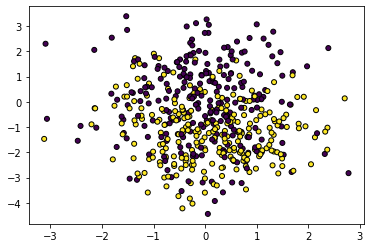

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4, n_clusters_per_class=2, random_state=14)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25, edgecolor='k')

scalar = StandardScaler()
X = scalar.fit_transform(X)

intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept, X), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

class LogisticRegression:
    def __init__(self, alpha=0.0001, max_iter=1000, old_loss=10000, method="minibatch"):
        self.alpha = alpha
        self.old_loss = old_loss
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X_train, y_train):
        self.thetas = np.zeros((X_train.shape[1]))
        #print(self.thetas.shape)
        if self.method == "minibatch":
            batch_size = int(0.1*X_train.shape[0])
            for i in range(self.max_iter):
                count = np.random.randint(0, X_train.shape[0])
                X_train_batch = X_train[count:count+batch_size, :]
                y_train_batch = y_train[count:count+batch_size]
                cost, grad = self.cost_and_gradient(X_train_batch, y_train_batch, self.thetas)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}:", cost)
                self.thetas = self.thetas - self.alpha*grad
            print(self.thetas, i)
    
    def cost_and_gradient(self, X_train_batch, y_train_batch, thetas):
        h = self.h_theta(X_train_batch, self.thetas)
        error = h - y_train_batch
        cost = - np.sum(y_train_batch * np.log(h) + (1-y_train_batch) * np.log(1-h))
        #print("X_train_batch.T.shape=",X_train_batch.T.shape, "error.shape=", error.shape)
        grad = X_train_batch.T @ error
        #print("cost=",cost,"grad.shape=", grad.shape)
        return cost, grad

    def h_theta(self, X, thetas):
        return self.sigmoid(X @ thetas)
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x)) 
    
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

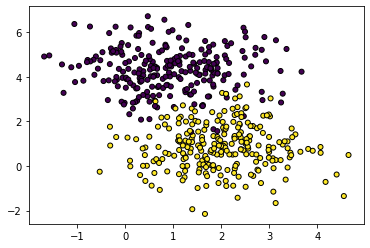

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

[1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1.]


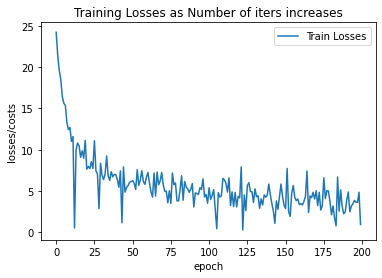

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept, X_test), axis=1)

class LogisticRegression:
    def __init__(self, alpha=0.0001, max_iter=1000, old_loss=10000, method="minibatch"):
        self.alpha = alpha
        self.old_loss = old_loss
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X_train, y_train):
        self.thetas = np.zeros(X_train.shape[1])
        self.losses = []
        #print(self.thetas.shape)
        if self.method == "minibatch":
            batch_size = int(0.1*X_train.shape[0])
            for i in range(self.max_iter):
                count = np.random.randint(0, X_train.shape[0])
                X_train_batch = X_train[count:count+batch_size, :]
                y_train_batch = y_train[count:count+batch_size]
                cost, grad = self.cost_and_gradient(X_train_batch, y_train_batch, self.thetas)
                if i % 100 == 0:
                    #print(f"Loss at iteration {i}", cost)
                    self.losses.append(cost)
                self.thetas = self.thetas - self.alpha*grad
            final_thetas = self.thetas
    
    def cost_and_gradient(self, X_train_batch, y_train_batch, thetas):
        h = self.h_theta(X_train_batch, self.thetas)
        error = h - y_train_batch
        cost = - np.sum(y_train_batch * np.log(h) + (1-y_train_batch) * np.log(1-h))
        grad = X_train_batch.T @ error
        #print("cost=",cost,"grad.shape=", grad.shape)
        return cost, grad

    def h_theta(self, X, thetas):
        return self.sigmoid(X @ thetas)
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x)) 
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Training Losses as Number of iters increases")
        plt.xlabel("epoch")
        plt.ylabel("losses/costs")
        plt.legend()
    
    def yhat(self, X_test):
        return np.round((self.h_theta(X_test, self.thetas)))
        
        
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)
model.plot()
yhat = model.yhat(X_test)
print(yhat)

In [4]:
class classification_report:
    def __init__(self, y_test, yhat):
        self.actual = y_test
        self.predicted = yhat
        self.true_positive = 0
        self.false_positive = 0
        self.true_negative = 0
        self.false_negative = 0
        for i in range(0,  len(yhat)):
            if (self.actual[i] == 1) and (self.predicted[i] == 1):
                self.true_positive += 1
            if (self.actual[i] == 0) and (self.predicted[i] == 1):
                self.false_positive += 1
            if (self.actual[i] == 0) and (self.predicted[i] == 0):
                self.true_negative += 1
            if (self.actual[i] == 1) and (self.predicted[i] == 0):
                self.false_negative += 1
#         print(self.true_positive)
#         print(self.false_positive)
#         print(self.true_negative)
#         print(self.false_negative)
    def Accuracy(self):
        return (self.true_positive+self.true_negative)/(self.true_positive+self.true_negative+self.false_positive+self.false_negative)
        
    def Recall(self):
        return (self.true_positive)/(self.true_positive+self.false_negative)
        
    def Precision(self):
        return (self.true_positive)/(self.true_positive+self.false_positive)
        
    def F1(self):
        return 2*((self.Precision()*self.Recall())/(self.Precision()+self.Recall()))

In [5]:
# print(y_test)
# print(yhat)
report1 = classification_report(y_test, yhat)
print("accuracy =", report1.Accuracy(),"\nrecall =", report1.Recall(),"\nprecision =", report1.Precision(),"\nF1 =", report1.F1())

accuracy = 0.9533333333333334 
recall = 0.9452054794520548 
precision = 0.9583333333333334 
F1 = 0.9517241379310345
